<a href="https://colab.research.google.com/github/fiofana/bootcamp-data-analytics/blob/main/stats/Exercicio_Estatistica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Importando dados fictícios
enem_df = pd.read_json('enem_2023.zip', compression='zip')
enem_df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [151]:
enem_df.rename(columns={'Ciências humanas': 'Ciências Humanas', 'Ciências da natureza': 'Ciências da Natureza'}, inplace=True)

In [152]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências Humanas      936 non-null    float64
 2   Ciências da Natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [153]:
enem_df.describe()

,Linguagens,Ciências Humanas,Ciências da Natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


                                             |          | [  0%]   00:00 -> (? left)


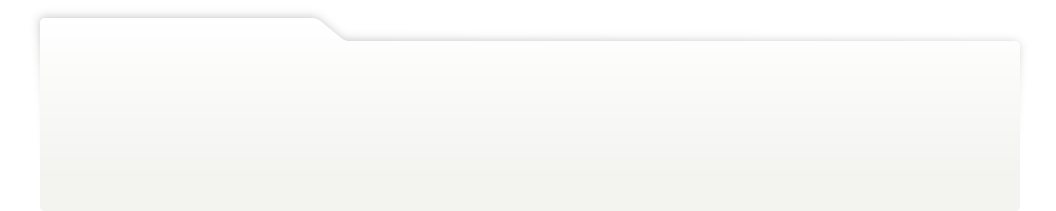
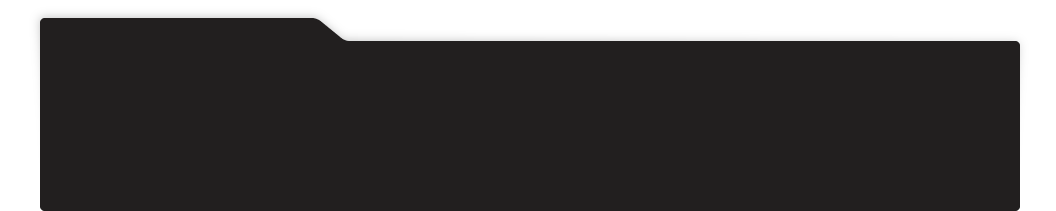
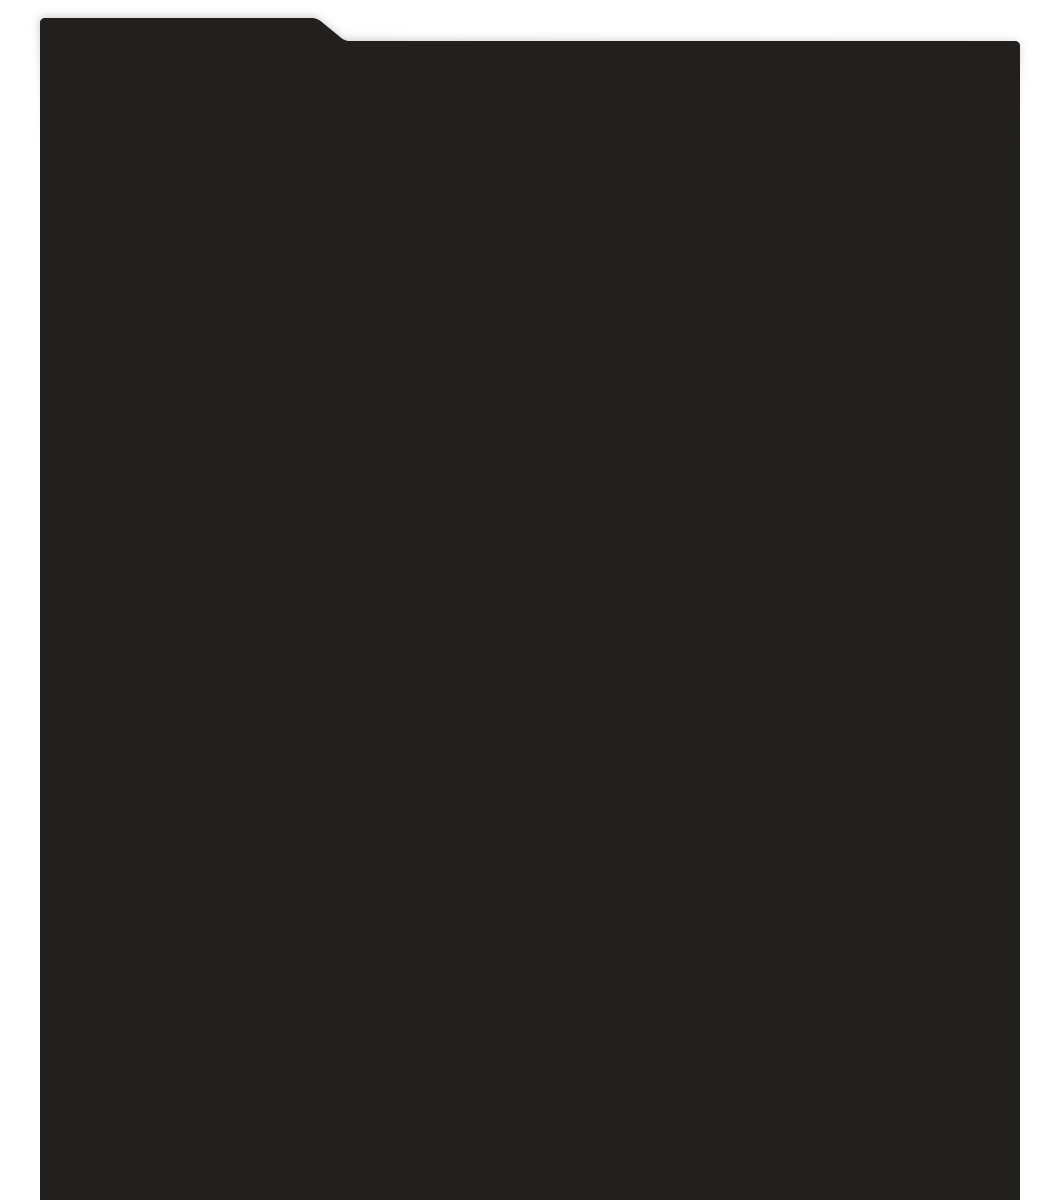
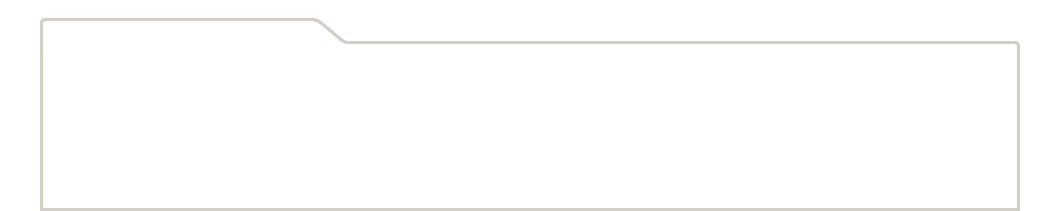
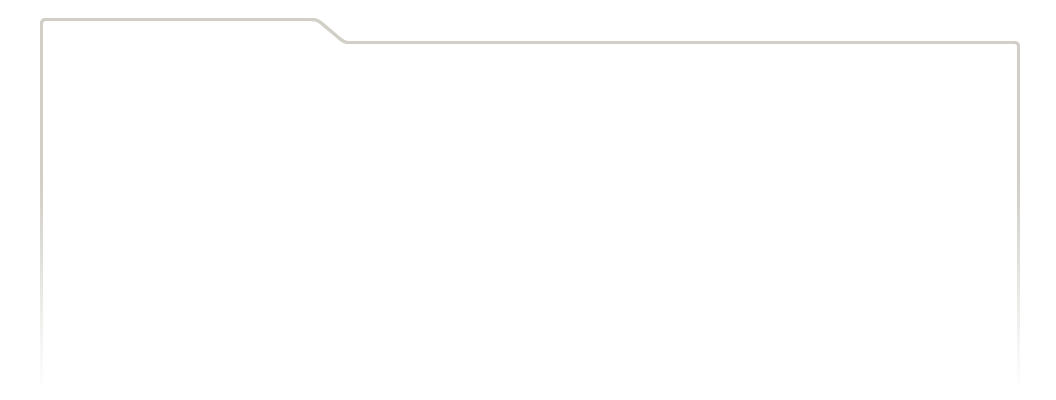
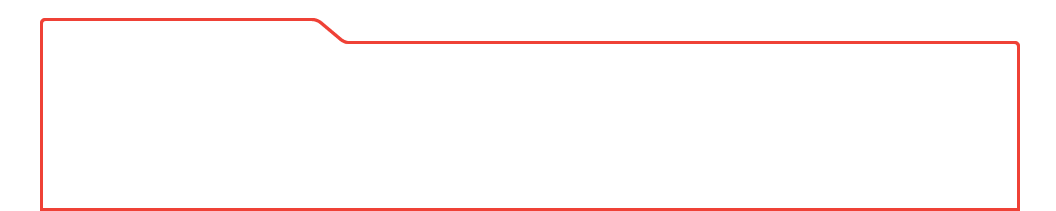
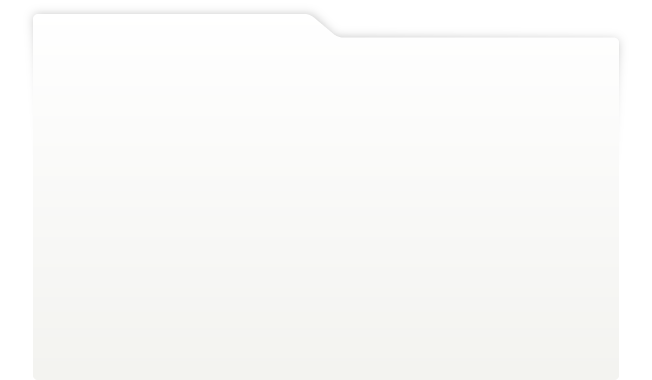
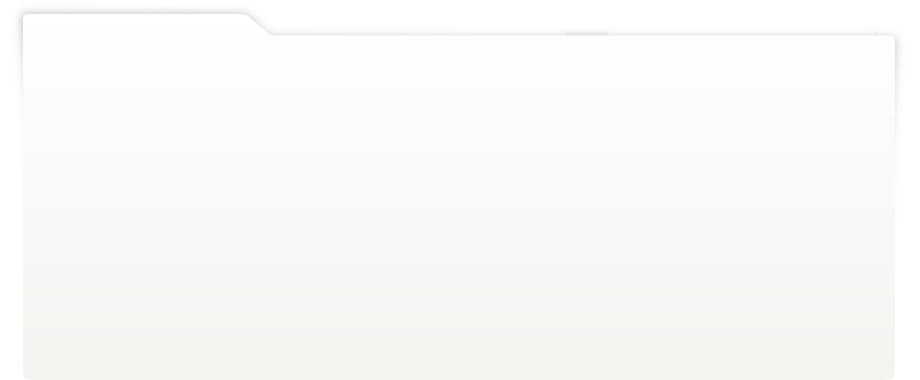
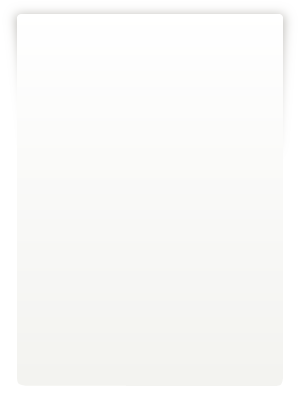
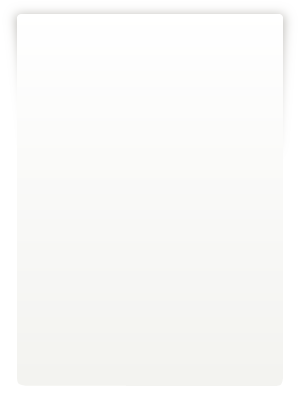
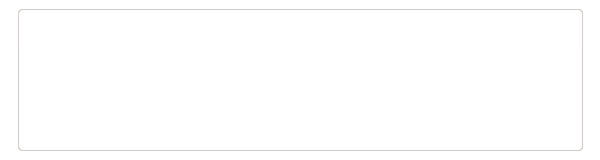
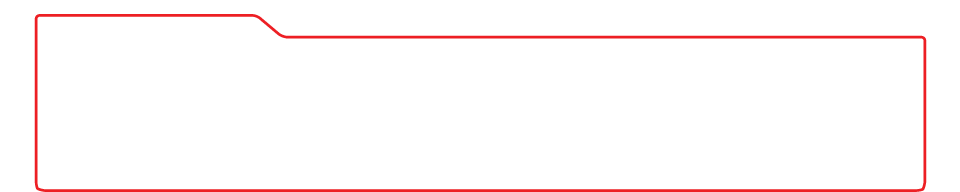
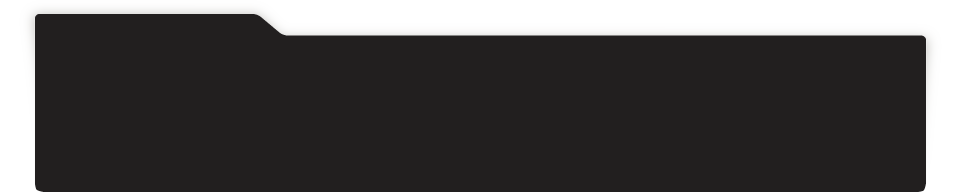
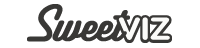
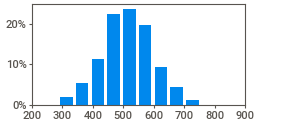
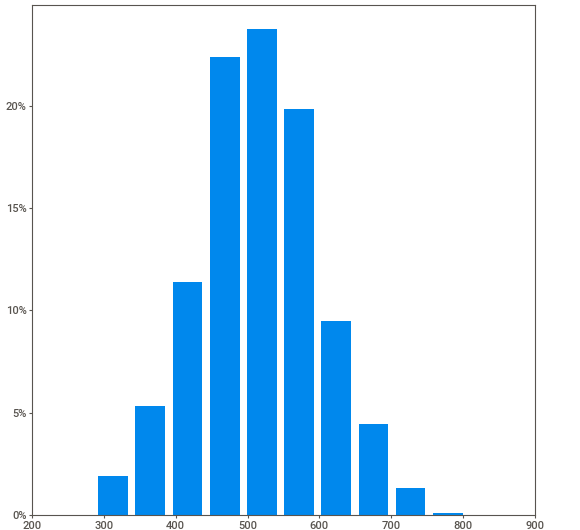
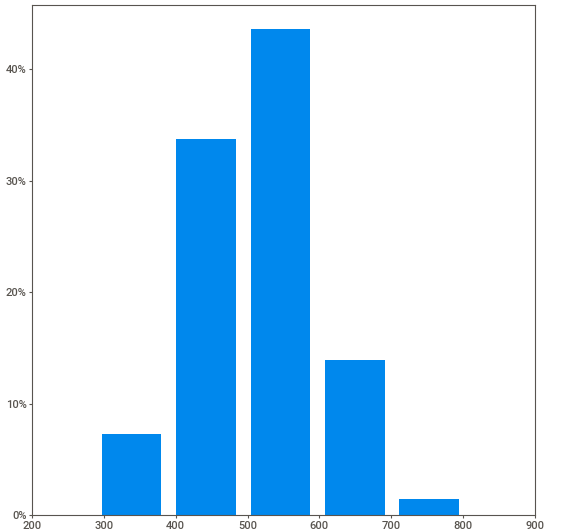
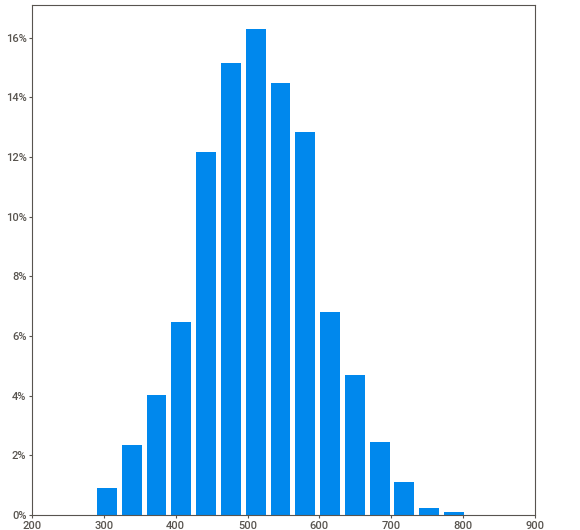
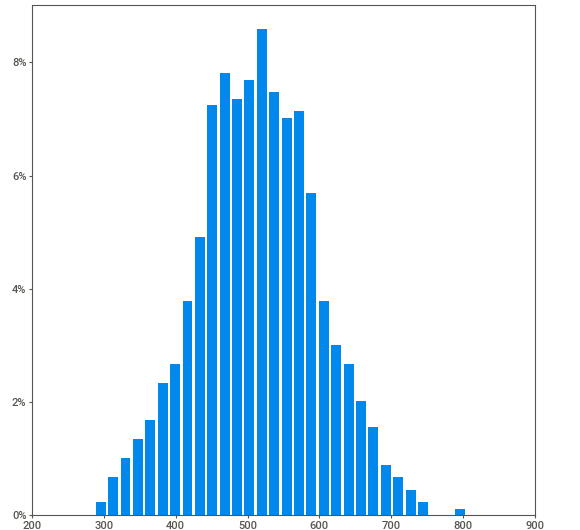
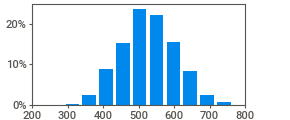
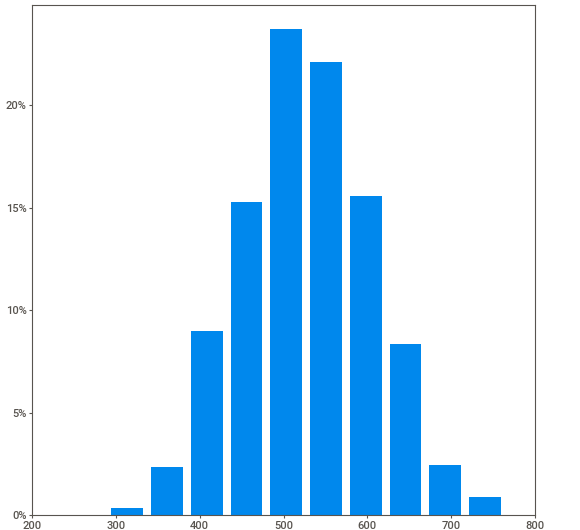
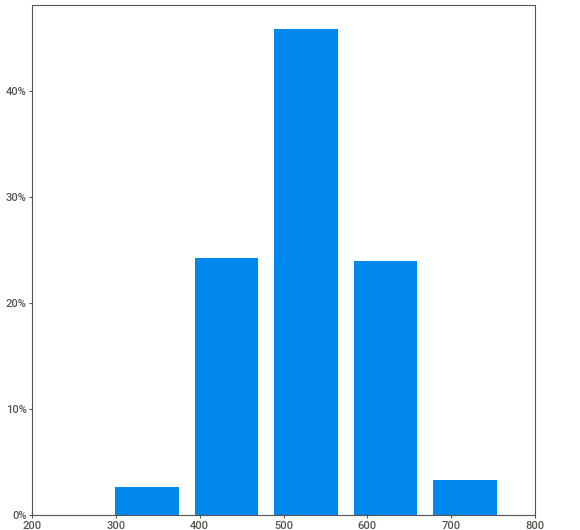
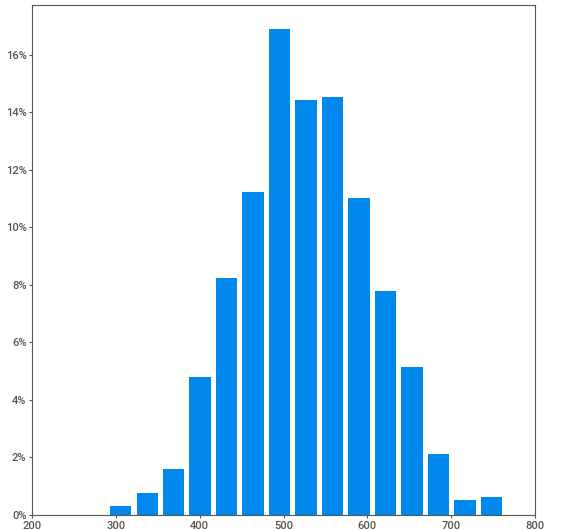
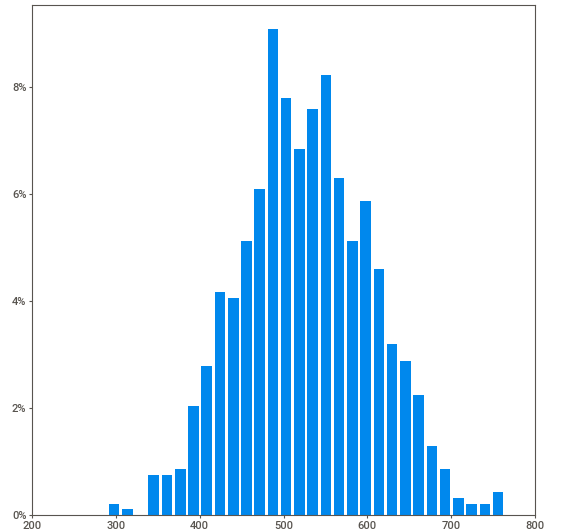
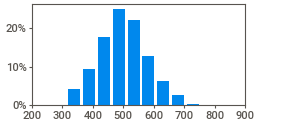
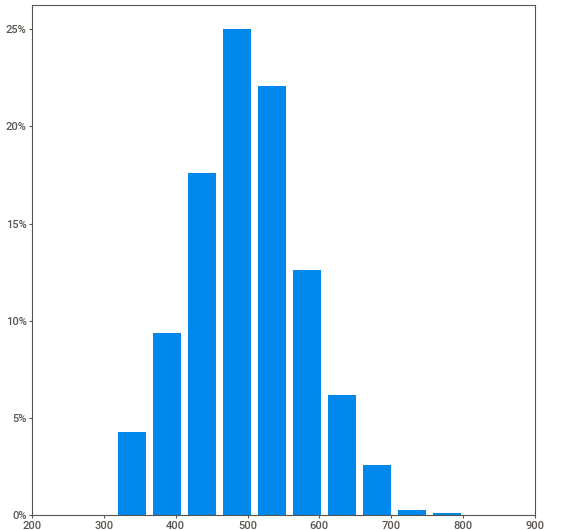
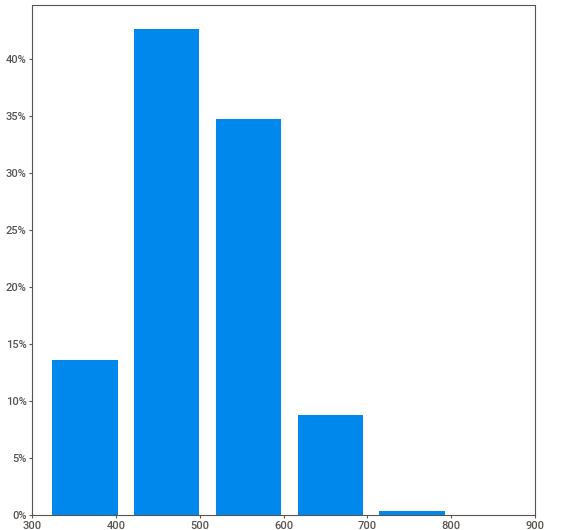
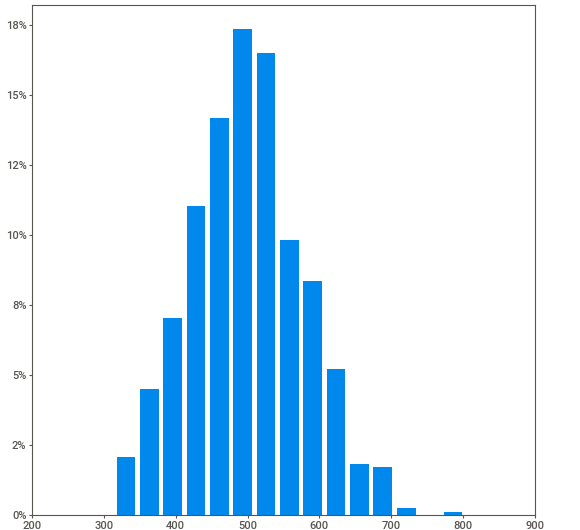
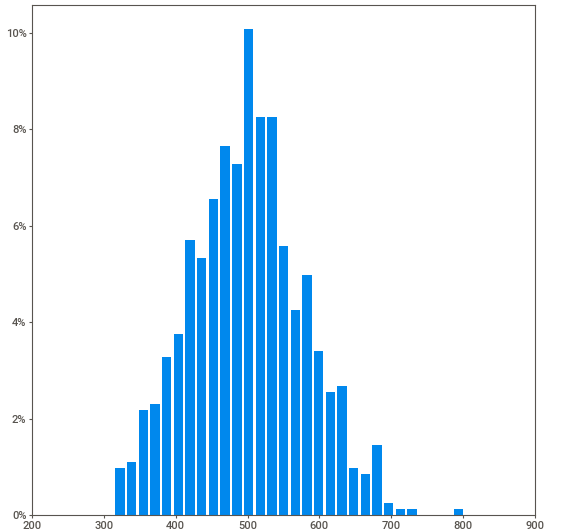
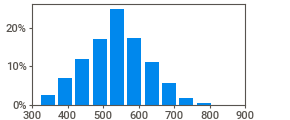
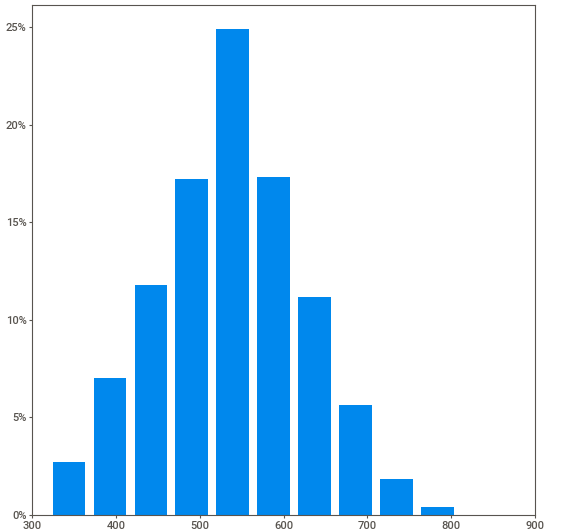
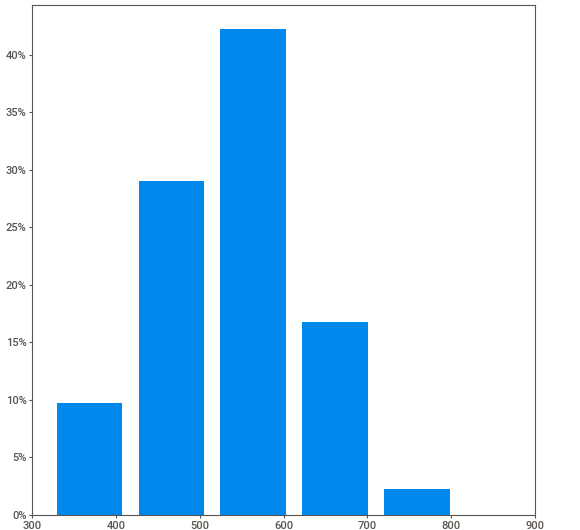
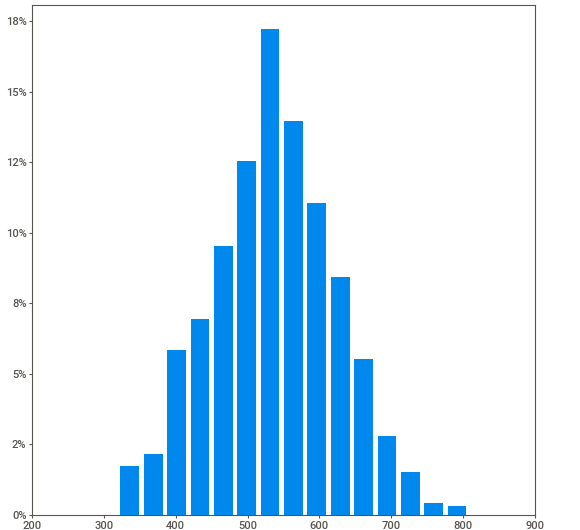
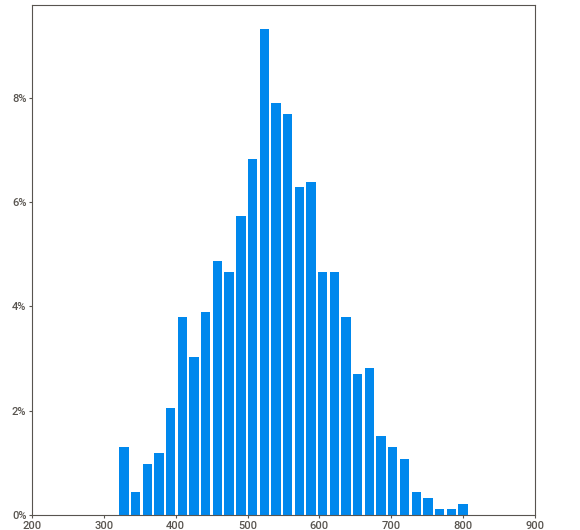
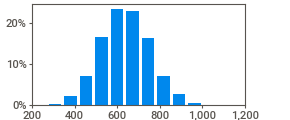
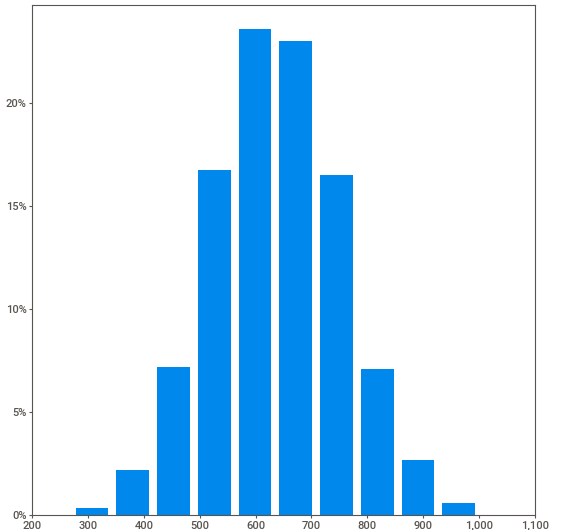
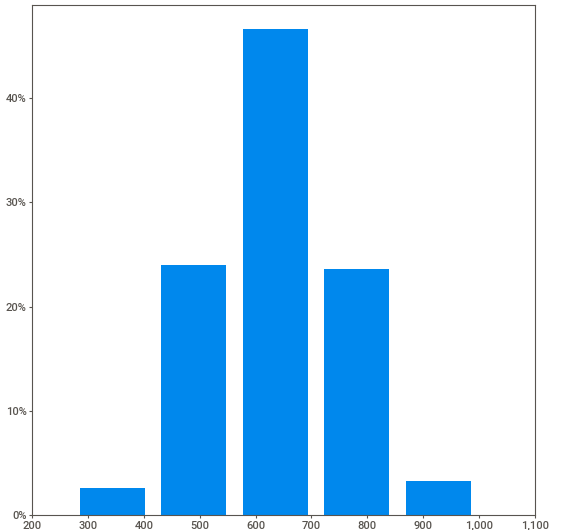
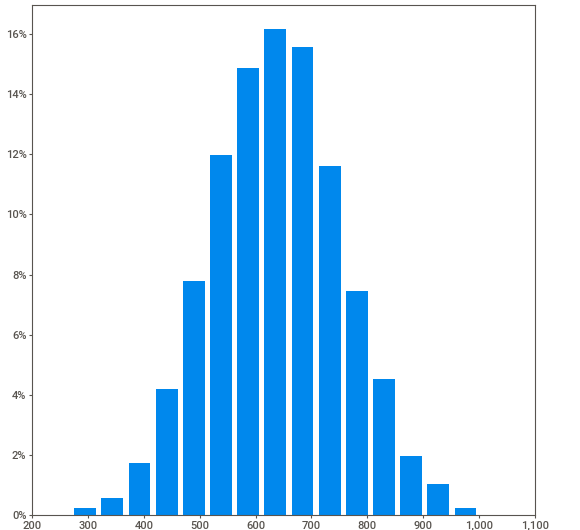
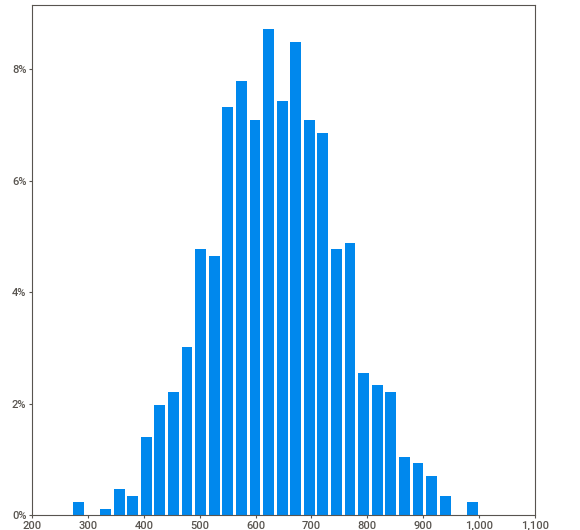
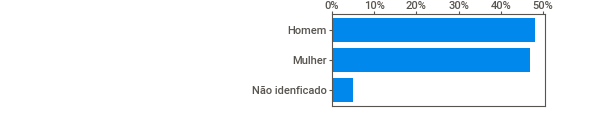
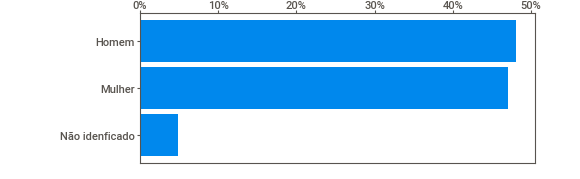
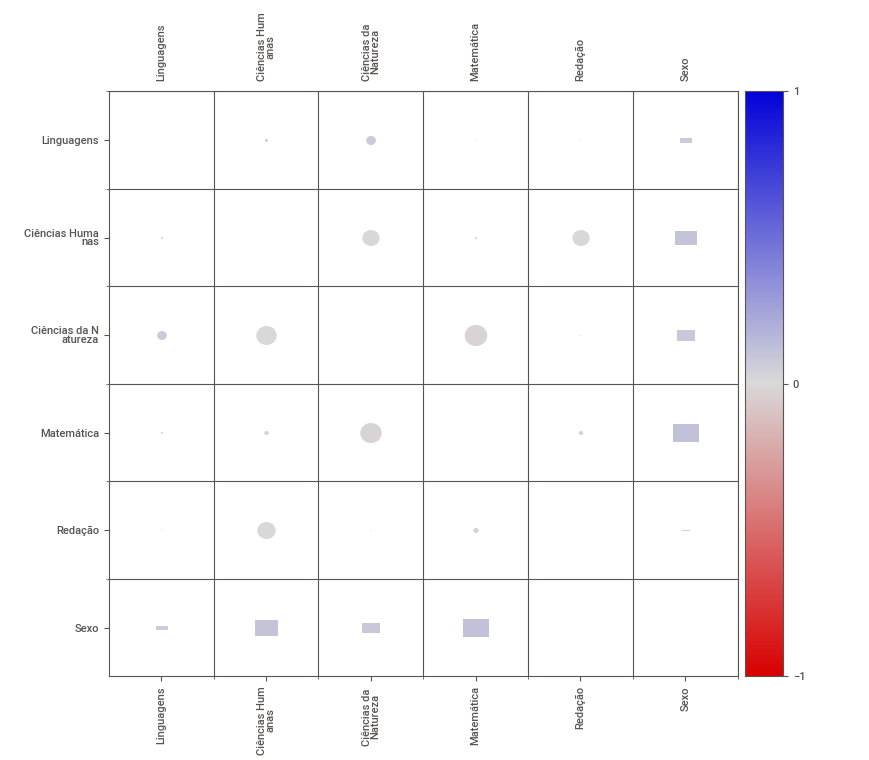
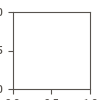

In [154]:
!pip install sweetviz --quiet
import sweetviz as sv

report = sv.analyze(enem_df)
report.show_notebook()

# 1. Qual das disciplinas tem a maior amplitude de nota?

In [155]:
disciplinas_df = enem_df.drop(columns=['Sexo'])

amplitude_disciplinas = disciplinas_df.max() - disciplinas_df.min()
amplitude_disciplinas

,0
Linguagens,517.456317
Ciências Humanas,474.019695
Ciências da Natureza,487.604568
Matemática,488.077902
Redação,729.160035


In [156]:
print(f'A disciplina com maior amplitude é {amplitude_disciplinas.idxmax()}, com uma amplitude de {amplitude_disciplinas.max():.2f}.')

A disciplina com maior amplitude é Redação, com uma amplitude de 729.16.


# 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)


In [157]:
disciplinas_df.mean()

,0
Linguagens,514.524809
Ciências Humanas,527.042281
Ciências da Natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [158]:
disciplinas_df.median(skipna=True)

,0
Linguagens,515.045250
Ciências Humanas,524.519920
Ciências da Natureza,500.479263
Matemática,533.247767
Redação,635.273973


# 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado: Redação - 2; Matemática e suas Tecnologias; Linguagens, Códigos e suas Tecnologias - 2; Ciências Humanas e suas Tecnologias - 1; Ciências da Natureza e suas Tecnologias - 1.  Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [159]:
# Definindo os pesos
pesos_ufpe = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências Humanas': 1,
    'Ciências da Natureza': 1
}

# Calculando a nota ponderada para cada aluno

notas_ufpe = enem_df.copy()

notas_ufpe['Nota Ponderada'] = (
    enem_df['Redação'] * pesos_ufpe['Redação'] +
    enem_df['Matemática'] * pesos_ufpe['Matemática'] +
    enem_df['Linguagens'] * pesos_ufpe['Linguagens'] +
    enem_df['Ciências Humanas'] * pesos_ufpe['Ciências Humanas'] +
    enem_df['Ciências da Natureza'] * pesos_ufpe['Ciências da Natureza']
)

In [160]:
notas_ufpe_top_500 = notas_ufpe.nlargest(500, 'Nota Ponderada')

# Calculando média e desvio padrão das notas ponderadas
media_top_500 = notas_ufpe_top_500['Nota Ponderada'].mean()
desvio_padrao_top_500 = notas_ufpe_top_500['Nota Ponderada'].std()

print(f'A média dos 500 estudantes mais bem colocados para Ciência da Computação na UFPE é {media_top_500:.2f}, com desvio padrão de {desvio_padrao_top_500:.2f}.')

A média dos 500 estudantes mais bem colocados para Ciência da Computação na UFPE é 5572.90, com desvio padrão de 404.36.


# 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [161]:
vagas = 40
alunos_ufpe = notas_ufpe.nlargest(vagas, 'Nota Ponderada')

# Calculando média e desvio padrão das notas ponderadas
media_alunos_ufpe = alunos_ufpe['Nota Ponderada'].mean()
variancia_alunos_ufpe = alunos_ufpe['Nota Ponderada'].var()

print(f'A média dos 40 estudantes que passaram para Ciência da Computação na UFPE é {media_alunos_ufpe:.2f}, com variância de {variancia_alunos_ufpe:.2f}.')

A média dos 40 estudantes que passaram para Ciência da Computação na UFPE é 6366.83, com variância de 29576.75.


# 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [162]:
q3_matematica = enem_df['Matemática'].quantile(0.75)
q3_linguagens = enem_df['Linguagens'].quantile(0.75)

print(f'Q3 para Matemática = {q3_matematica:.2f} \nQ3 para Linguagens = {q3_linguagens:.2f}')

Q3 para Matemática = 592.91 
Q3 para Linguagens = 571.64


# 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

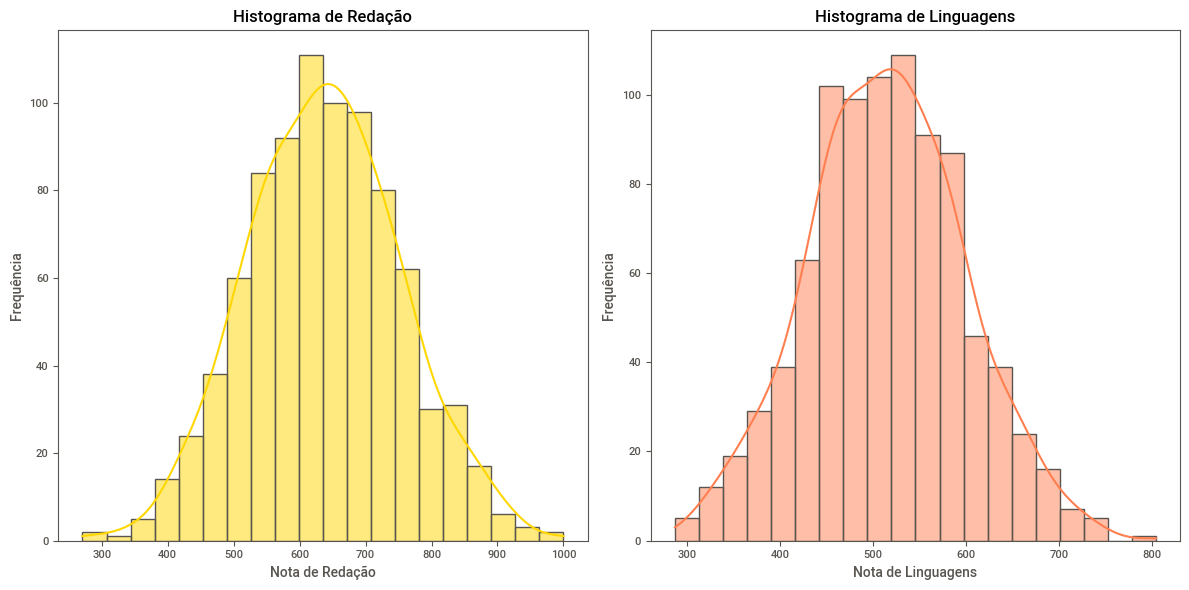

In [163]:
plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
sns.histplot(enem_df['Redação'], bins=20, kde=True, color='gold')
plt.title('Histograma de Redação')
plt.xlabel('Nota de Redação')
plt.ylabel('Frequência')

# Histograma para Linguagens
plt.subplot(1, 2, 2)
sns.histplot(enem_df['Linguagens'], bins=20, kde=True, color='coral')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota de Linguagens')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Os histogramas parecem ser simétricos entre os intervalos de 300-1000 e 200-800, respectivamente.

# 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria?

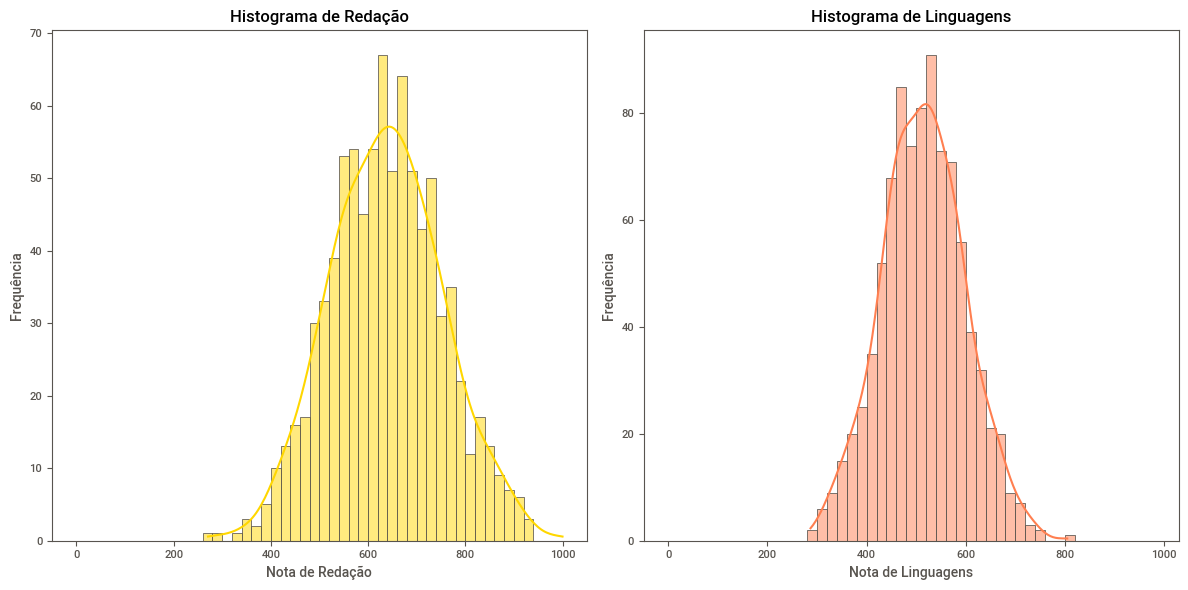

In [164]:
plt.figure(figsize=(12, 6))

# Histograma para Redação
plt.subplot(1, 2, 1)
sns.histplot(enem_df['Redação'], bins=range(0, 1000, 20), kde=True, color='gold')
plt.title('Histograma de Redação')
plt.xlabel('Nota de Redação')
plt.ylabel('Frequência')

# Histograma para Linguagens
plt.subplot(1, 2, 2)
sns.histplot(enem_df['Linguagens'], bins=range(0, 1000, 20), kde=True, color='coral')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota de Linguagens')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

No intervalo completo, o histograma de Redação parece ser assimétrico à esquerda, indicando que as notas para essa disciplina tendem a ser maiores. O histograma de Linguagens ainda parece simétrico.

8. Faça um boxplot do quartil de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

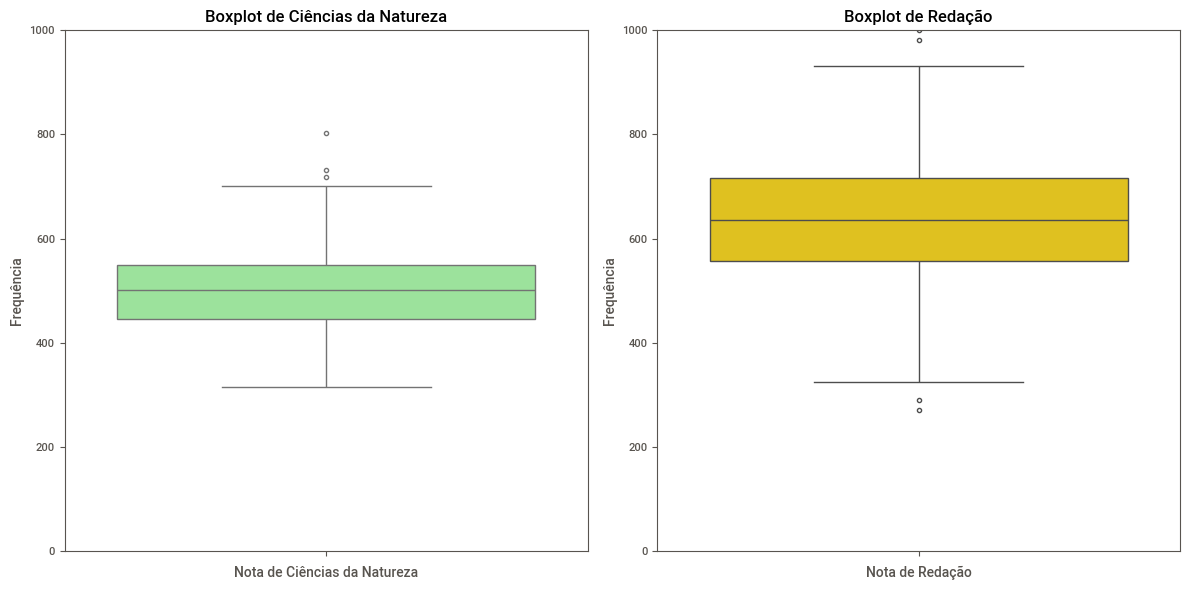

In [165]:
plt.figure(figsize=(12, 6))

# Boxplot para Ciências da Natureza
plt.subplot(1, 2, 1)
ax = sns.boxplot(enem_df['Ciências da Natureza'], color='lightgreen')
ax.set(ylim=(0, 1000))
plt.title('Boxplot de Ciências da Natureza')
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Frequência')

# Boxplot para Redação
plt.subplot(1, 2, 2)
ax = sns.boxplot(enem_df['Redação'], color='gold')
ax.set(ylim=(0, 1000))
plt.title('Boxplot de Redação')
plt.xlabel('Nota de Redação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

No boxplot já é possível observar a presença de outliers:
*   3 além do limite superior para Ciências da Natureza
*   2 abaixo do limite inferior para Redação
*   2 além do limite superior para Redação



In [166]:
# Método IQR para identificação de outliers

def metodo_iqr(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

    return outliers

In [167]:
outliers_natureza = metodo_iqr(enem_df['Ciências da Natureza'])
outliers_redacao = metodo_iqr(enem_df['Redação'])

In [168]:
outliers_natureza

,Ciências da Natureza
325,802.004568
482,732.502964
483,718.396061


In [169]:
outliers_redacao

,Redação
9,270.839965
545,290.308608
720,1000.000000
870,981.016553


9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [170]:
disciplinas_df.mean()

,0
Linguagens,514.524809
Ciências Humanas,527.042281
Ciências da Natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [171]:
# Inicializa uma lista para armazenar os índices dos outliers
indices_outliers = set()

# Itera sobre cada coluna para identificar os índices dos outliers
for coluna in disciplinas_df.columns:
    outliers = metodo_iqr(disciplinas_df[coluna].dropna())
    indices_outliers.update(disciplinas_df[disciplinas_df[coluna].isin(outliers)].index)

disciplinas_sem_outliers_df = disciplinas_df.drop(index=indices_outliers)

In [173]:
disciplinas_sem_outliers_df.mean()

,0
Linguagens,513.911020
Ciências Humanas,525.676599
Ciências da Natureza,497.999285
Matemática,535.727852
Redação,636.516694


In [178]:
media = disciplinas_df.mean()
media_sem_outliers = disciplinas_sem_outliers_df.mean()

diferenca_media = (media - media_sem_outliers)/media_sem_outliers.mean() * 100
diferenca_media

,0
Linguagens,0.113252
Ciências Humanas,0.251987
Ciências da Natureza,0.242874
Matemática,0.043879
Redação,0.233749


Os outliers não são capazes de alterar significativamente a média para nenhuma disciplina (<0,3%).

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [192]:
# Substituindo valores nulos por média, moda e mediana
disciplinas_media = disciplinas_sem_outliers_df.fillna(disciplinas_df.mean())
disciplinas_moda = disciplinas_sem_outliers_df.fillna(disciplinas_df.mode().iloc[0])
disciplinas_mediana = disciplinas_sem_outliers_df.fillna(disciplinas_df.median())

In [193]:
diferenca_subs_media = diferenca_subs_media = pd.DataFrame()
diferenca_subs_media['Média'] = (disciplinas_media.mean() - disciplinas_sem_outliers_df.mean()) / disciplinas_sem_outliers_df.mean() * 100
diferenca_subs_media['Desvio Padrão'] = (disciplinas_media.std() - disciplinas_sem_outliers_df.std()) / disciplinas_sem_outliers_df.std() * 100

diferenca_subs_media

,Média,Desvio Padrão
Linguagens,0.012347,-5.315180
Ciências Humanas,0.017018,-3.333237
Ciências da Natureza,0.046262,-9.179467
Matemática,0.003408,-3.918977
Redação,0.027705,-7.227653


In [194]:
diferenca_subs_moda = diferenca_subs_moda = pd.DataFrame()
diferenca_subs_moda['Média'] = (disciplinas_moda.mean() - disciplinas_sem_outliers_df.mean()) / disciplinas_sem_outliers_df.mean() * 100
diferenca_subs_moda['Desvio Padrão'] = (disciplinas_moda.std() - disciplinas_sem_outliers_df.std()) / disciplinas_sem_outliers_df.std() * 100

diferenca_subs_moda

,Média,Desvio Padrão
Linguagens,-4.564513,26.360571
Ciências Humanas,-2.938106,23.818211
Ciências da Natureza,-6.452735,28.015277
Matemática,-3.094077,17.512953
Redação,-7.997088,45.576210


In [191]:
diferenca_subs_mediana = diferenca_subs_mediana = pd.DataFrame()
diferenca_subs_mediana['Média'] = (disciplinas_mediana.mean() - disciplinas_sem_outliers_df.mean()) / disciplinas_sem_outliers_df.mean() * 100
diferenca_subs_mediana['Desvio Padrão'] = (disciplinas_mediana.std() - disciplinas_sem_outliers_df.std()) / disciplinas_sem_outliers_df.std() * 100

diferenca_subs_mediana

,Média,Desvio Padrão
Linguagens,0.129866,-3.681615
Ciências Humanas,0.229086,-0.202200
Ciências da Natureza,0.305443,-7.598242
Matemática,0.005833,-2.017519
Redação,0.143830,-5.254799


Comparando com o dataframe sem outliers, a substituição de valores pela mediana representa os menores valores percentuais de alteração para os desvios padrão e médias.